In [0]:
import tensorflow as tf

import matplotlib as mpl
import matplotlib.pyplot as plt
import numpy as np
import os
import pandas as pd
import math

from sklearn.preprocessing import StandardScaler

In [0]:
mpl.rcParams['figure.figsize'] = (8, 6)
mpl.rcParams['axes.grid'] = False

In [0]:
df = pd.read_csv('/tmp/telemetry.csv')

In [4]:
df.head()

,datetime,machineID,volt,rotate,pressure,vibration,yval
0,1/1/2015 6:00,9,223.853296,397.308127,102.874438,42.983808,0
1,1/1/2015 7:00,9,153.106118,478.409758,102.027505,31.964379,0
2,1/1/2015 8:00,9,208.751664,362.823273,93.187589,41.234198,0
3,1/1/2015 9:00,9,188.851492,538.069951,95.469670,37.226319,0
4,1/1/2015 10:00,9,214.927439,482.550151,104.072420,38.141405,0


In [0]:
features_considered = ['volt', 'rotate', 'pressure', 'vibration']
features = df[features_considered]
features.index = df['datetime']
features.head()
yfeats = df['yval']
yfeats.index = df['datetime']

In [43]:
TRAIN_SIZE = 8000
X = features.values
mu = X[:TRAIN_SIZE].mean(axis=0)
mu = mu.reshape(1, 4)
# data_std = X.std(axis=0)
sigma2 = X[:TRAIN_SIZE].var(axis=0)
sigma2 = sigma2.reshape(1, 4)
Xval = X[TRAIN_SIZE:]
yval = yfeats.values
yval = yval[TRAIN_SIZE:]
print(mu)
print(X[:TRAIN_SIZE].std(axis=0))

[[170.82178616 446.40076996 100.74863557  40.30464966]]
[15.68074995 52.90707942 10.99770003  5.33468787]


In [0]:
def multivariateGaussian(X, mu, sigma2):
     n = np.size(sigma2, 1)
     m = np.size(sigma2, 0)
     #print(m,n)
     
     if n == 1 or m == 1:
        # print('Yes!')
         sigma2 = np.diag(sigma2[0, :])
     #print(sigma2)
     X = X - mu
     pi = math.pi
     det = np.linalg.det(sigma2)
     inv = np.linalg.inv(sigma2)
     val = np.reshape((-0.5)*np.sum(np.multiply((X@inv),X), 1),(np.size(X, 0), 1))
     #print(val.shape)
     p = np.power(2*pi, -n/2)*np.power(det, -0.5)*np.exp(val)
     
     return p

In [0]:
p = multivariateGaussian(X, mu, sigma2)

In [0]:
pval = multivariateGaussian(Xval, mu, sigma2)

In [0]:
def selectThreshHold(yval, pval):
    
    F1 = 0
    bestF1 = 0
    bestEpsilon = 0
    
    stepsize = (np.max(pval) - np.min(pval))/1000
        
    epsVec = np.arange(np.min(pval), np.max(pval), stepsize)
    noe = len(epsVec)
    
    for eps in range(noe):
        epsilon = epsVec[eps]
        pred = (pval < epsilon)
        prec, rec = 0,0
        tp,fp,fn = 0,0,0
        
        try:
            for i in range(np.size(pval,0)):
                if pred[i] == 1 and yval[i] == 1:
                    tp+=1
                elif pred[i] == 1 and yval[i] == 0:
                    fp+=1
                elif pred[i] == 0 and yval[i] == 1:
                    fn+=1
            prec = tp/(tp + fp)
            rec = tp/(tp + fn)
            F1 = 2*prec*rec/(prec + rec)
            if F1 > bestF1:
                bestF1 = F1
                bestEpsilon = epsilon
        except ZeroDivisionError:
            continue         
       
    return bestF1, bestEpsilon

In [32]:
F1, epsilon = selectThreshHold(yval, pval)
print('Epsilon and F1 are:',epsilon, F1)

Epsilon and F1 are: 1.5162795545654433e-07 0.004228329809725158


In [0]:
outl = (p < epsilon)

In [0]:
def findIndices(binVec):
    l = []
    for i in range(len(binVec)):
        if binVec[i] == 1:
            l.append(i)
    return l

In [0]:
listOfOutliers = findIndices(outl)

In [41]:
count_outliers = len(listOfOutliers)
print('\n\nNumber of outliers:', count_outliers)
print('\n',listOfOutliers)



Number of outliers: 5578

 [0, 1, 2, 3, 4, 6, 8, 9, 11, 12, 13, 15, 17, 18, 20, 21, 24, 25, 26, 28, 29, 30, 33, 34, 36, 38, 39, 40, 41, 42, 46, 49, 51, 52, 54, 55, 56, 57, 59, 60, 61, 63, 65, 66, 68, 69, 70, 72, 75, 77, 80, 84, 85, 86, 89, 93, 95, 96, 97, 98, 99, 104, 105, 106, 107, 109, 110, 111, 113, 114, 115, 116, 117, 118, 119, 122, 123, 124, 125, 126, 127, 128, 129, 130, 131, 132, 133, 134, 137, 138, 139, 140, 141, 142, 143, 144, 145, 147, 150, 151, 152, 153, 154, 156, 157, 158, 159, 160, 162, 164, 166, 168, 169, 170, 171, 174, 177, 180, 183, 185, 186, 187, 190, 191, 192, 193, 194, 195, 196, 197, 199, 202, 203, 204, 206, 210, 213, 214, 216, 218, 220, 222, 223, 224, 225, 228, 229, 230, 231, 232, 233, 236, 237, 238, 239, 242, 243, 244, 245, 247, 249, 253, 257, 258, 259, 260, 261, 262, 263, 264, 265, 266, 267, 268, 269, 270, 271, 272, 273, 274, 275, 276, 277, 278, 279, 281, 282, 283, 284, 285, 286, 287, 288, 289, 291, 292, 293, 294, 295, 296, 297, 298, 299, 300, 301, 302, 303, 304,

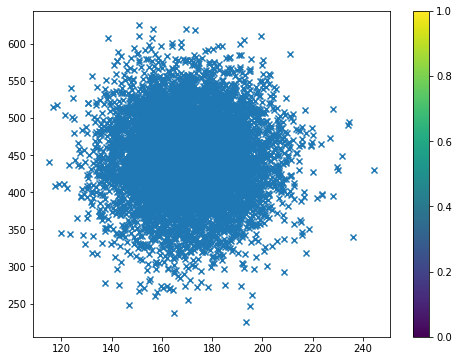

In [38]:

plt.figure(figsize=(8,6))
plt.scatter(dataset[:,0],dataset[:,1],marker="x",c=p,cmap='viridis');
plt.colorbar();